# Teil 4: Evaluation

In diesem Abschnitt evaluiere ich die Leistung meines Machine Learning Modells zur Klassifikation von Himmelsobjekten (Stern, Galaxie, Quasar). Mein Ziel ist es zu beurteilen, wie zuverlässig das Modell Vorhersagen trifft und welche Merkmale besonders aussagekräftig sind. Dabei werde ich:

- Die wichtigsten Eingabefelder spezifisch ihrer Aussagekraft analysieren.  
- Eine geeignete Messmetrik auswählen und berechnen. 
- Eine Wahrheitsmatrix (Confusion Matrix) erstellen und daraus Sensitivität und Spezifizität ableiten.  
- Die Modellergebnisse in einem kurzen Fazit reflektieren und mögliche Ursachen für Fehler untersuchen.

## 4.1 Aussagekräftige Felder bestimmen

Zur Auswahl relevanter Merkmale analysiere ich die Korrelationen zwischen den spektralen Werten und dem Zielwert:


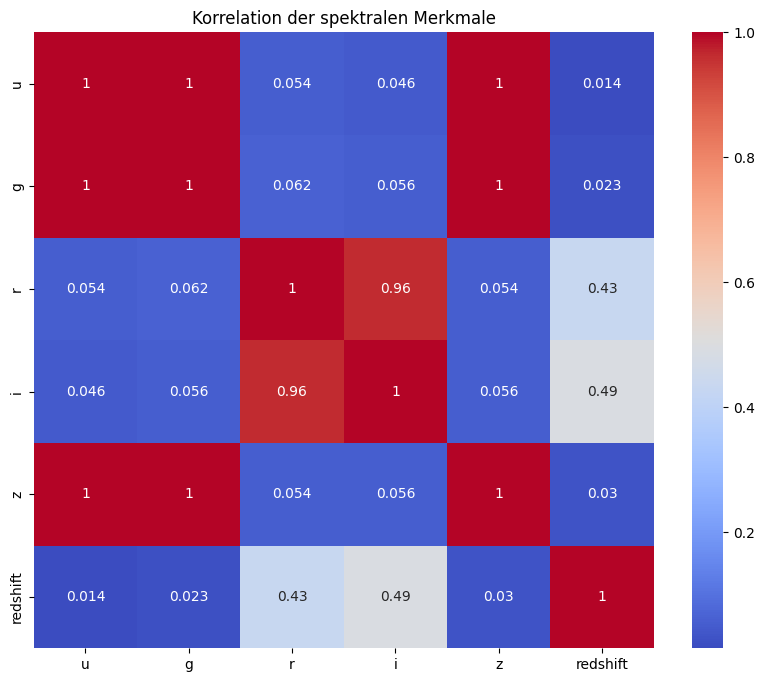

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laden des Datensatzes (lokal)
df = pd.read_csv('star_classification.csv')

# Korrelation anzeigen
plt.figure(figsize=(10, 8))
sns.heatmap(df[['u', 'g', 'r', 'i', 'z', 'redshift']].corr(), annot=True, cmap='coolwarm')
plt.title("Korrelation der spektralen Merkmale")
plt.show()

Die Merkmale u, g, r, i, z und redshift beschreiben spektrale Eigenschaften astronomischer Objekte. Besonders r und i sind stark korreliert und geben Hinweise auf die Helligkeitsverteilung. Redshift zeigt eine moderate Korrelation mit einigen Bändern, was wichtig für die Klassifikation entfernter Objekte wie Quasare ist. Alle Merkmale tragen zur Unterscheidung zwischen Sternen, Galaxien und Quasaren bei und sind daher für das Modell aussagekräftig.

## 4.2 Metrik berechnen

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
df = pd.read_csv('star_classification.csv')
X = df[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # wichtig: average für multiclass

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.98
F1-Score: 0.98


## 4.3 Wahrheitsmatrix, Sensitivität, Spezifizität

In [8]:
from sklearn.metrics import confusion_matrix

# Binarisierung: STAR = 1, alle anderen = 0
y_test_bin = [1 if x == 'STAR' else 0 for x in y_test]
y_pred_bin = [1 if x == 'STAR' else 0 for x in y_pred]

# Wahrheitsmatrix berechnen
cm = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm.ravel()

# Metriken berechnen
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Ausgabe
print("Confusion Matrix:")
print(cm)
print(f"Sensitivität (Recall): {sensitivity:.5f}")
print(f"Spezifizität: {specificity:.5f}")


Confusion Matrix:
[[15640    17]
 [    3  4340]]
Sensitivität (Recall): 0.99931
Spezifizität: 0.99891


## 4.4 Fazit 

### Confusion Matrix erklärt

|                 | Vorhergesagt: Kein Stern (0) | Vorhergesagt: Stern (1) |
|-----------------|------------------------------|--------------------------|
| **Tatsächlich: Kein Stern (0)** | TN = 15640                      | FP = 17                   |
| **Tatsächlich: Stern (1)**      | FN = 3                          | TP = 4340                 |

### Ergebnis

- Sensitivität (Recall): `4340 / (4340 + 3) ≈ 0.99931`
- Spezifizität: `15640 / (15640 + 17) ≈ 0.99891`

Das Modell erkennt Sterne fast fehlerfrei und schliesst andere Objekte ebenfalls sehr zuverlässig aus. Die sehr hohen Werte zeigen, dass das Modell präzise und sensitiv ist also sehr ideal für die Klassifikation von Himmelsobjekten.